# Assignment-2

## Importing libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1) Reading data from csv file

In [139]:
dataset=pd.read_csv(r'./Iris.csv')
print(dataset)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   
0      1            5.1           3.5            1.4           0.2  \
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

## 2) Printing number of rows and columns

In [140]:
print("number of rows:",dataset.shape[0])
print("number of columns:",dataset.shape[1])

number of rows: 150
number of columns: 6


## 3) Printing the name of each column

In [141]:
print("Columns:",list(dataset.columns))

Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


## 4) Printing the data type of each column

In [142]:
print(dataset.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


## 5) Mean and variance of each column

In [143]:
print(pd.DataFrame(data={
    "Column":dataset.columns[1:-1],
    "mean":[dataset[i].mean() for i in dataset.columns[1:-1]],
    "variance":[(dataset[i].std())**2 for i in dataset.columns[1:-1]]
})
)

          Column      mean  variance
0  SepalLengthCm  5.843333  0.685694
1   SepalWidthCm  3.054000  0.188004
2  PetalLengthCm  3.758667  3.113179
3   PetalWidthCm  1.198667  0.582414


## 6) Histogram

### Chosing number of bins using Square Root Rule:
**Square Root Rule**: According to this rule, the number of bins, k, can be calculated as k = √N, where N is the number of samples. This rule is a simple approximation and works well for a wide range of datasets.

Here are a few advantages of using the square root rule:

- Simplicity: The square root rule is easy to understand and implement. It provides a quick way to estimate the number of bins without requiring complex calculations or statistical assumptions.

- Generalizability: The square root rule is a general guideline that can be applied to a wide range of datasets, regardless of their size or distribution. It offers a reasonable starting point for choosing an appropriate number of bins.

- Flexibility: The square root rule automatically adjusts the number of bins based on the dataset size. As the dataset grows, the number of bins also increases proportionally. This adaptability allows for consistent visualization and comparison of histograms across datasets of varying sizes.

- Balance between Over-smoothing and Over-detailing: The square root rule strikes a balance between oversimplifying the data distribution by using too few bins and over-detailing it by using too many bins. It aims to provide a visually informative representation of the data without excessive noise or loss of important features.



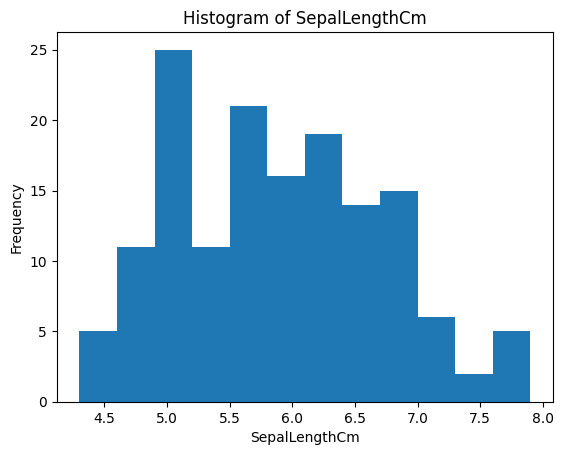

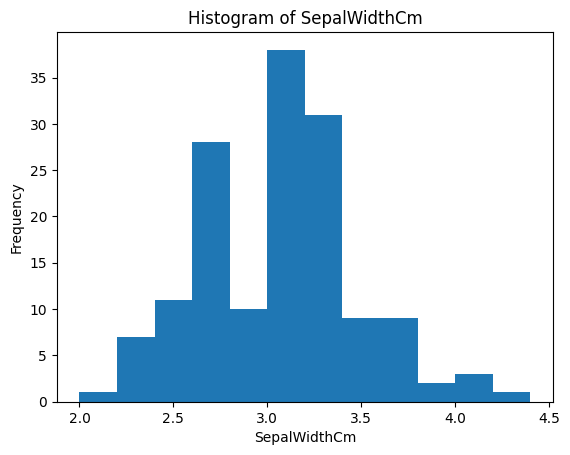

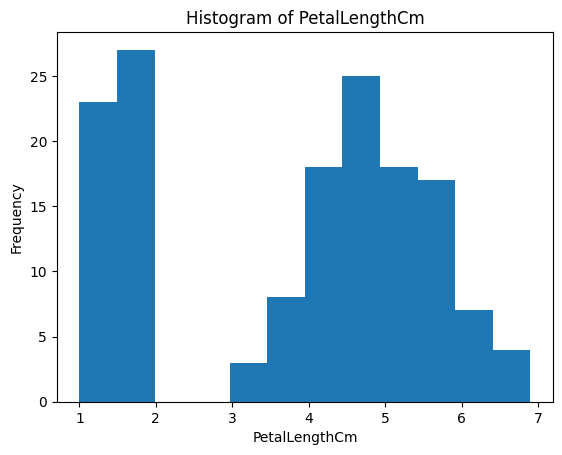

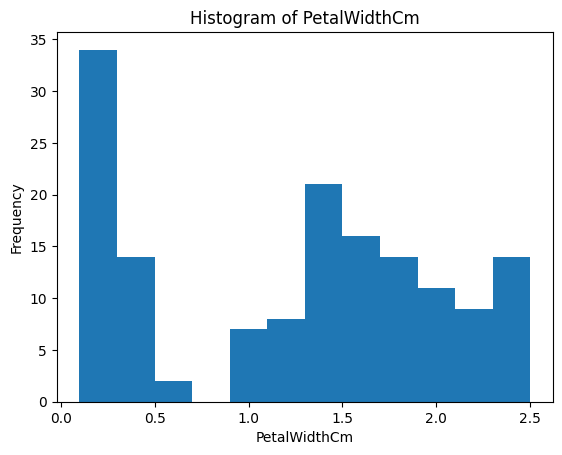

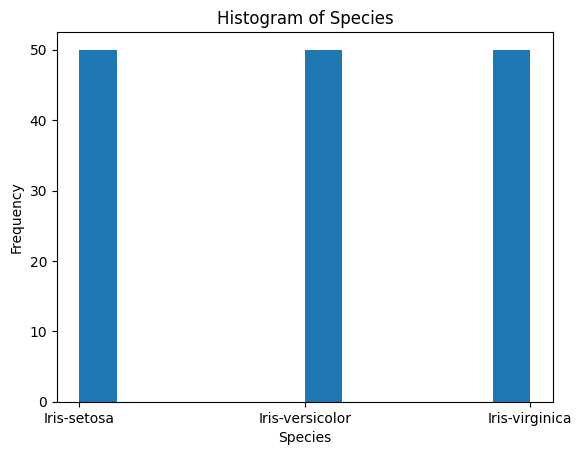

In [144]:
column_names = dataset.columns[1:]

# Determine the number of bins using the Square Root Rule
num_bins = int(round(dataset.iloc[:,1:].shape[0] ** 0.5))

# Plot histograms for each column
for column in column_names:
    plt.hist(dataset[column], bins=num_bins)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

## 7) Finding correlation matrix

In [145]:
correlation_matrix = dataset.iloc[:,1:-1].corr()
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


### Conclusion:
- SepalLengthCm shows a strong positive correlation with PetalLengthCm (0.871754) and PetalWidthCm (0.817954). This indicates that as the sepal length increases, there is a tendency for the petal length and petal width to also increase. This correlation is moderate to strong, suggesting a potential relationship between these variables.

- SepalWidthCm has a weak negative correlation with both SepalLengthCm (-0.109369) and PetalLengthCm (-0.420516). This implies that as the sepal width increases slightly, there is a tendency for the sepal length and petal length to decrease slightly. However, the negative correlation is weak, indicating that the relationship is not very strong.

- PetalLengthCm exhibits a strong positive correlation with both SepalLengthCm (0.871754) and PetalWidthCm (0.962757). This suggests that as the petal length increases, there is a strong tendency for the sepal length and petal width to also increase. The correlation between petal length and sepal length is particularly strong, indicating a potential strong relationship between these variables.

- PetalWidthCm shows a strong positive correlation with both SepalLengthCm (0.817954) and PetalLengthCm (0.962757). This implies that as the petal width increases, there is a strong tendency for the sepal length and petal length to also increase. The correlation between petal width and petal length is particularly strong, indicating a potential strong relationship between these variables.

### Heat map 

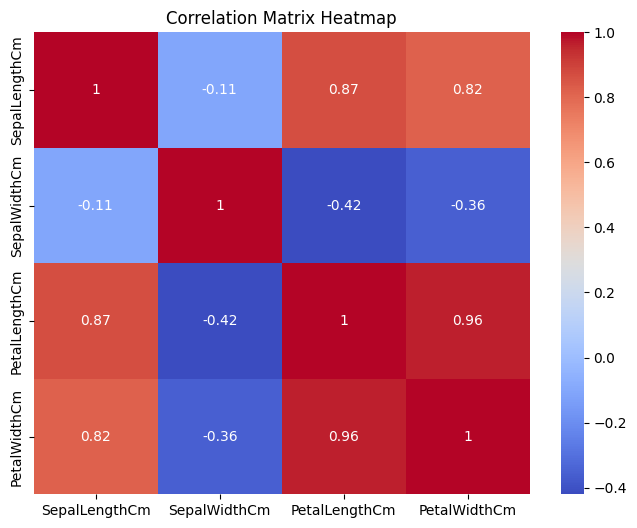

In [146]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## 8) Plottting scatterplot between each pair of columns

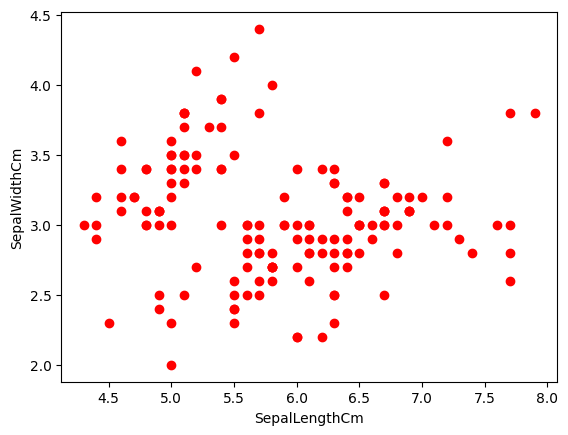

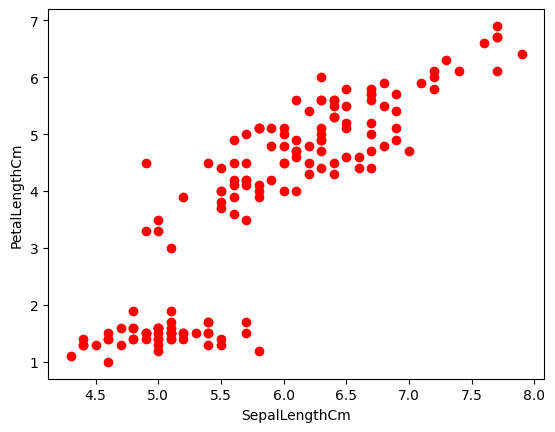

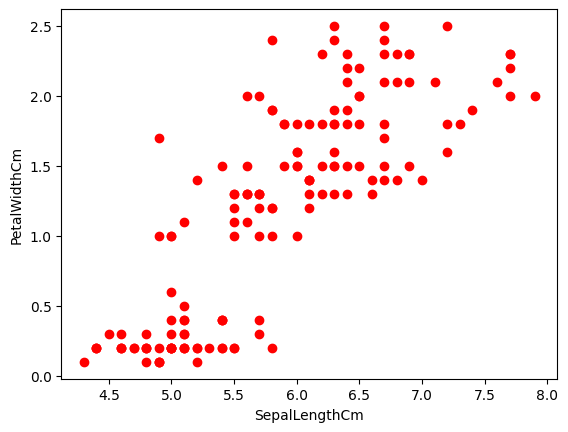

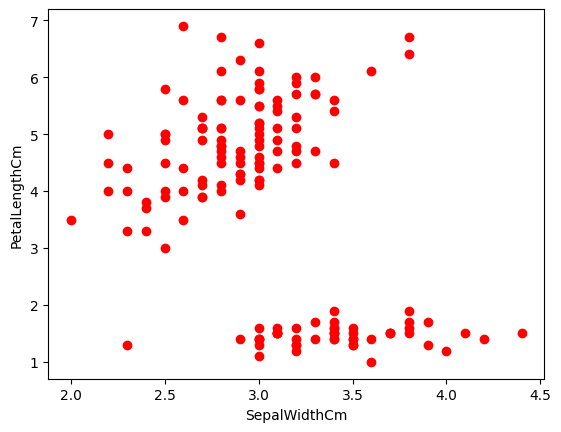

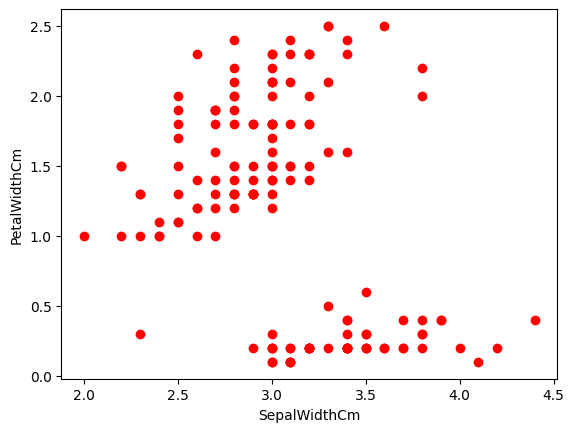

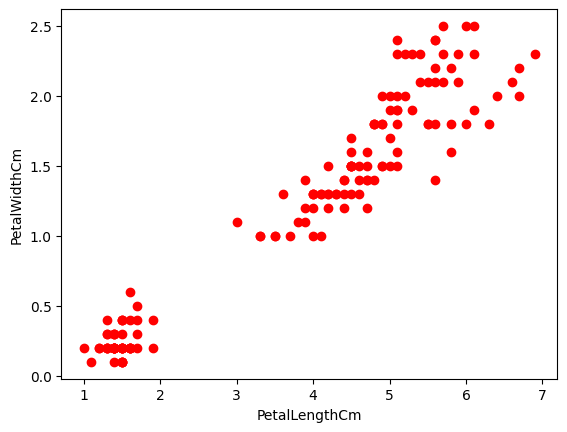

In [147]:
Stack=[]
for i in dataset.columns[1:-1]:
    for j in dataset.columns[1:-1]:
        if i==j:
            continue
        if [j,i] in Stack:
            continue
        if [i,j] in Stack:
            continue
        Stack.append([i,j])
        plt.scatter(dataset[i],dataset[j],color='red')
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

## 9) Q-Q plot

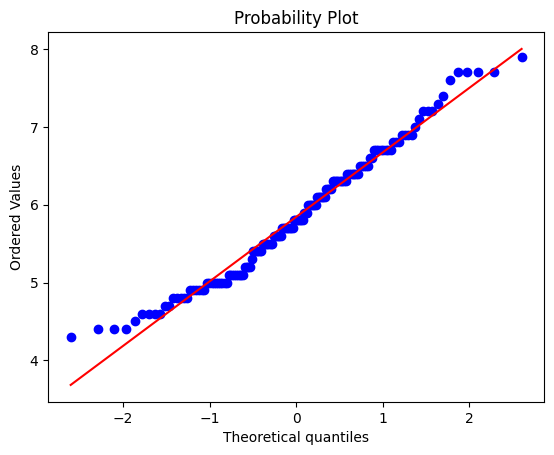

In [160]:
from scipy import stats
import pylab

stats.probplot(dataset.SepalLengthCm,dist='norm',plot=pylab)
pylab.show()

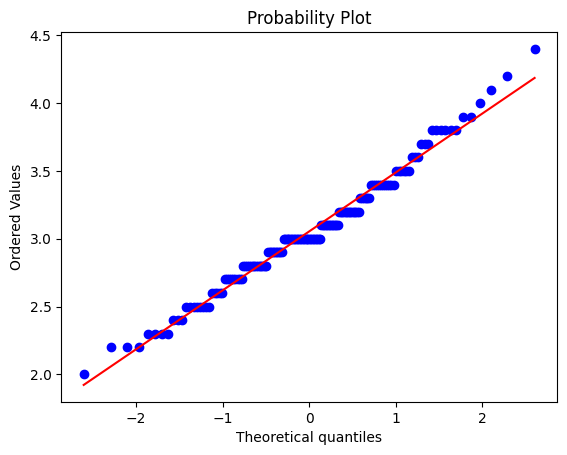

In [161]:
stats.probplot(dataset.SepalWidthCm,dist='norm',plot=pylab)
pylab.show()

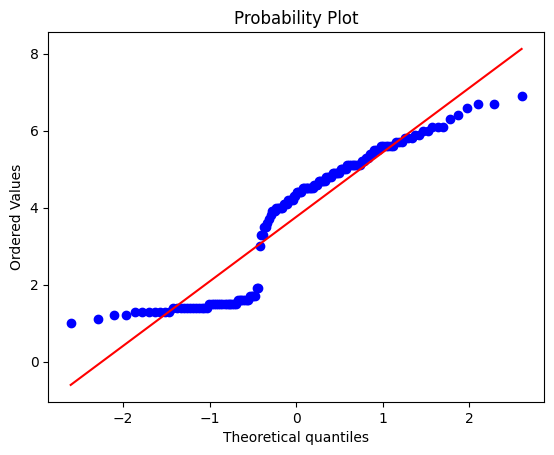

In [162]:
stats.probplot(dataset.PetalLengthCm,dist='norm',plot=pylab)
pylab.show()

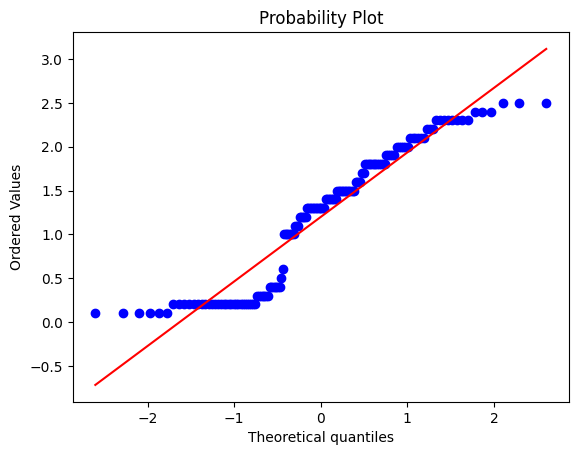

In [163]:
stats.probplot(dataset.PetalWidthCm,dist='norm',plot=pylab)
pylab.show()

### Definition:
- Q-Q plot helps us understand how well our data matches a theoretical distribution. It provides a visual representation of whether the data points fall along a straight line, which indicates a good fit to the theoretical distribution, or deviate from the line, indicating a poor fit.
- The Q-Q plot works by plotting the observed quantiles of the dataset on the y-axis and the expected quantiles from the theoretical distribution on the x-axis. If the data points closely align with the reference line (usually a straight line), it suggests that the dataset follows the expected distribution. On the other hand, if the data points deviate significantly from the line, it indicates a departure from the expected distribution.
- By examining the Q-Q plot, we can gain insights into the distributional characteristics of our data. We can identify whether the data is normally distributed, skewed, or exhibits other types of distributional deviations. This information is valuable for making informed decisions in statistical analysis and understanding the behavior of our data.

### Conclusion on this dataset:
Data approximately matches **Normal Distribution**.(As we can see that the scattered points are along the Q-Q line of equality)


## 10) Box and Whisker's plot

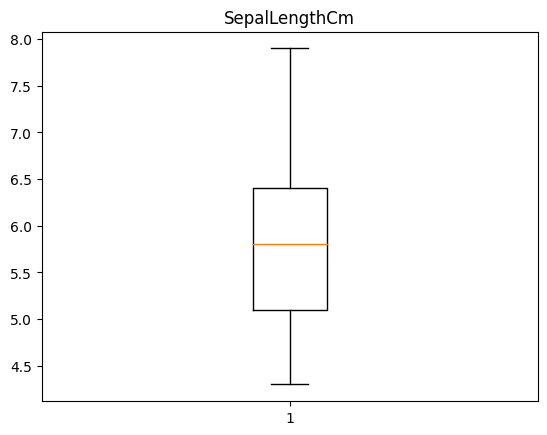

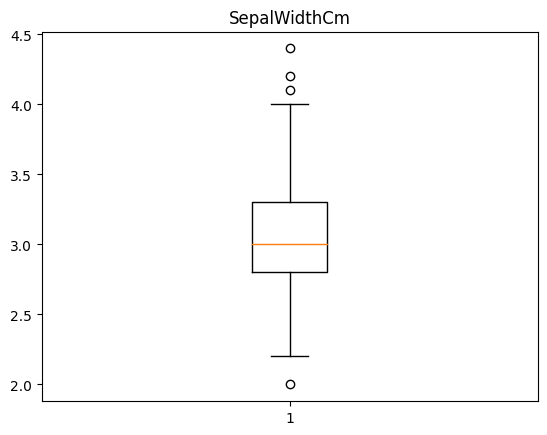

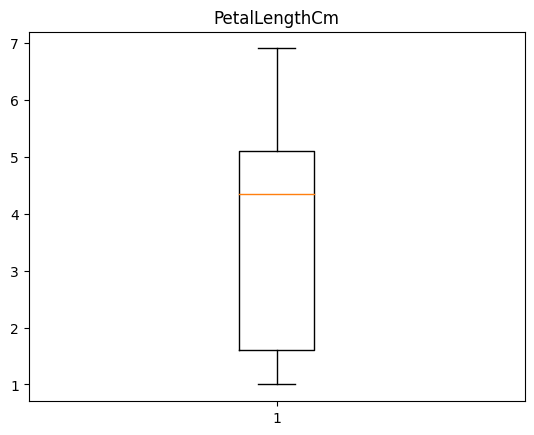

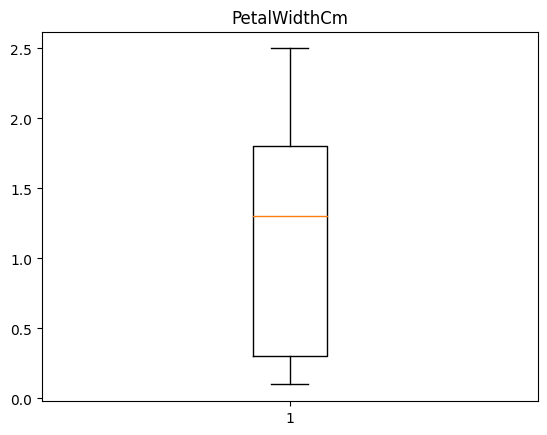

In [165]:
for col in dataset.iloc[:,1:-1].columns:
    plt.boxplot(dataset[col])
    plt.title(col)
    plt.show()

## 11) When faced with unknown data, Here are some strategies for preprocessing, analysis, and extracting useful information as far as i studied:

### I.Data Preprocessing:

- Handling missing values: Identify and handle missing values appropriately, either by imputation (replacing missing values with estimated values) or removing rows/columns with a high number of missing values.
- Data cleaning: Remove any irrelevant or noisy data, correct inconsistencies, and standardize the data format if necessary.
- Feature scaling: Normalize or standardize numerical features to ensure they are on a similar scale, especially for algorithms sensitive to the magnitude of values.
- Handling categorical data: Encode categorical variables into numerical representations using techniques like one-hot encoding or label encoding.

### II.Exploratory Data Analysis (EDA):

- Descriptive Statistics: Calculate summary statistics (mean, median, standard deviation, etc.) to understand the central tendency, spread, and distribution of numerical features.
- Data Visualization: Create plots, such as histograms, scatter plots, box plots, and heatmaps, to visualize the relationships and patterns in the data.
- Correlation Analysis: Explore correlations between variables to identify potential dependencies or associations.

### However, it's essential to consider cases where these strategies may not work:
- Insufficient or poor-quality data: If the data is incomplete, contains significant missing values, or is of low quality, the results of preprocessing and analysis may be unreliable or biased.
- Non-representative sample: If the data is not a representative sample of the target population or suffers from selection bias, the insights and conclusions drawn may not generalize well.
- Complex relationships: Some data may exhibit intricate relationships that cannot be captured by simple statistical techniques or modeling approaches. In such cases, advanced techniques like machine learning algorithms or specialized modeling techniques may be required.



## 12) Optional - Splitting the dataset and plotting accordingly to find out which factor affects the most among the three species.

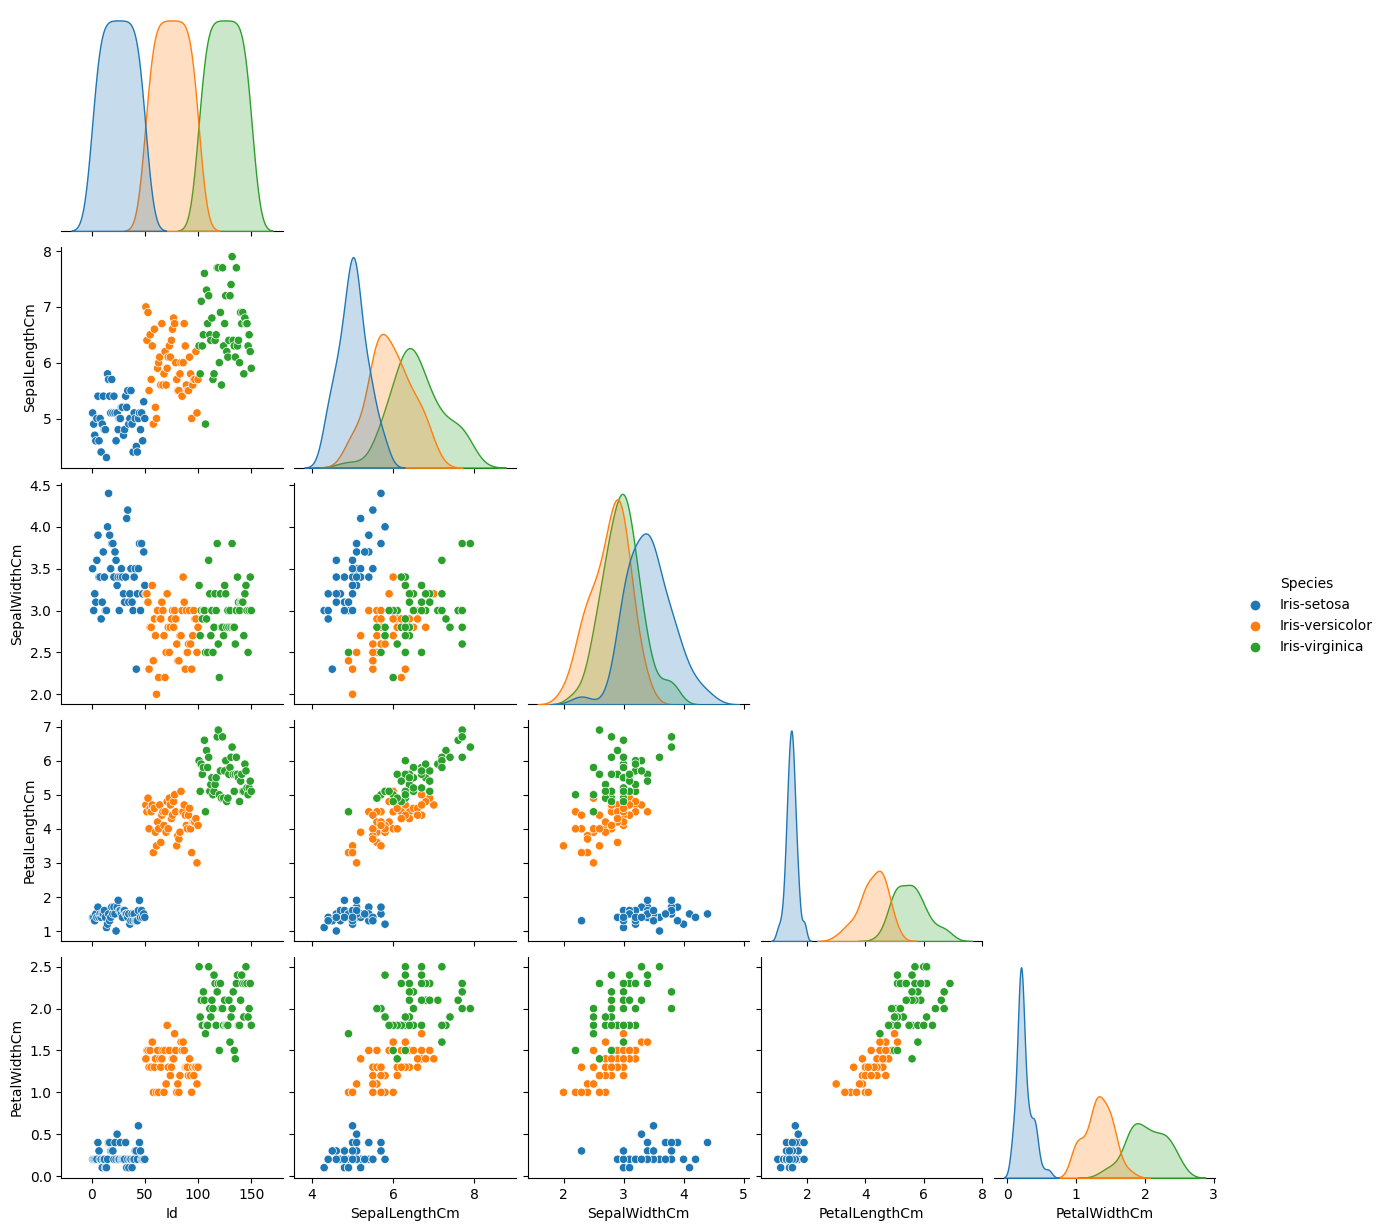

In [167]:
sns.pairplot(dataset, hue="Species",corner=True)

### **Conclusion**: 
According to the above pair plot, It is evident that the features "PetalWidthCm" and "PetalLengthCm" exhibit a strong correlation with the target variable "Species." This suggests that these two features are crucial in distinguishing the three categories of species. Therefore, we can conclude that "PetalWidthCm" and "PetalLengthCm" are the most important features for classifying the species in the given dataset.